In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
import numpy as np
import amat_utils

## initialize

In [2]:
target = Chem.MolFromSmiles("[H][C@]1(OC(/C=C/C2=CC=CC=C2)=O)[C@@]3([H])[C@](CC[C@]3([H])C)([H])[C@]([C@H](OC(CO)=O)C4)(C)O[C@]14C(C)C")
Chem.Kekulize(target,clearAromaticFlags=True)

In [3]:
target_atoms = [atm.GetAtomicNum() for atm in target.GetAtoms()]
target_symbs = [atm.GetSymbol() for atm in target.GetAtoms()]

amat = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)
amat_init = Chem.GetAdjacencyMatrix(target,useBO=True,force=True)


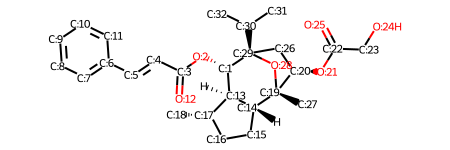

In [4]:
amat_utils.mol_with_atom_index(target)

### Christmann route


In [5]:
changelogs = amat_utils.make_changelogs("./edit_files/edits_englerin_christmann.csv")
changelogs[:3]

[{'edits': ()},
 {'pad': 0,
  'pad_elem': [],
  'edits': [(1, 1, 1),
   (19, 19, 1),
   (29, 29, 1),
   (20, 20, 1),
   (14, 14, 1),
   (13, 13, 1),
   (17, 17, 1)]},
 {'pad': 1, 'pad_elem': [14], 'edits': [(24, 33, 1)]}]

In [6]:
out_1,final_atoms_1 = amat_utils.apply_changes(amat_init, target_atoms,changelogs[1:])

In [7]:
draw_mols = []
from rdkit.Chem.Draw import *
for i in range(len(out_1)):
    print(i+1)
    m = amat_utils.molFromAdjMat(final_atoms_1,out_1[i])
    Chem.SanitizeMol(m)
    draw_mols.append(m)
    print(Chem.MolToSmiles(m))

1
C.C.C=C(C)C(C)C.CC1=COC(=O)C2C(C)CCC12.O.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
2
C.C.C=C(C)C(C)C.CC1CCC2C1C(=O)OC1OC12C.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
3
C.C.C=C(C)C(C)C.CC1CCC2C1C(=O)OC2(C)C=O.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
4
C.C.C=C(CC(O)C1(C)OC(=O)C2C(C)CCC21)C(C)C.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
5
C.C.C=C(CC(O)C(C)(O)C1CCC(C)C1CO)C(C)C.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
6
C.C=C(CC1OCOC1(C)C1CCC(C)C1CO)C(C)C.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
7
C.C=C(CC1OCOC1(C)C1CCC(C)C1C=O)C(C)C.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
8
C.C=C(CC1OCOC1(C)C1CCC(C)C1C=O)C(C)C.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
9
C=CC1C(C)CCC1C1(C)OCOC1CC(=C)C(C)C.O.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
10
C.C.CC(C)C1=CC2C(C)CCC2C2(C)OCOC2C1.O.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
11
C.C.C.CC(C)C1=CC2C(C)CCC2C(C)(O)C(O)C1.O.O.O=CC=Cc1ccccc1.O=CCO[SiH3]
12
C.C.C.CC(C)C1=CC2C(C)CCC2C(C)(O)C(OC(=O)CO[SiH3])C1.O.O.O=CC=Cc1ccccc1
13
C.C.C.CC1CCC2C1C1OC1(C(C)C)CC(OC(=O)CO[SiH3])C2(C)O.O.O=CC=Cc1ccccc1
14
C.C.C.CC1CCC2C1C(O)C1(C(C)C)CC(OC(=O)CO[SiH3])C2(C)O1.O.O=CC=Cc1ccccc1
15
C.C.C.C

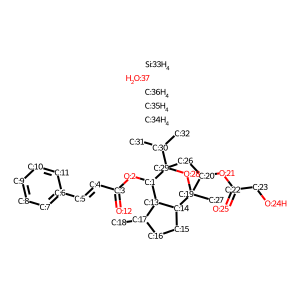

In [8]:
Chem.Draw.MolToImage(amat_utils.mol_with_atom_index(draw_mols[-1]))

In [9]:
save_dict = {"amats":out_1[:-1],"atoms":final_atoms_1}

np.savez("./matrices/englerin_christmann",**save_dict)

### Chain route

In [10]:
changelogs = amat_utils.make_changelogs("./edit_files/edits_englerin_chain.csv")
changelogs[:3]

[{'edits': ()},
 {'pad': 2,
  'pad_elem': [8, 16],
  'edits': [(1, 1, 1),
   (19, 19, 1),
   (29, 29, 1),
   (20, 20, 1),
   (14, 14, 1),
   (13, 13, 1),
   (17, 17, 1),
   (33, 34, 1)]},
 {'pad': 0, 'pad_elem': [], 'edits': [(20, 21, -1), (20, 33, 1)]}]

In [11]:
out_1,final_atoms_1 = amat_utils.apply_changes(amat_init, target_atoms,changelogs[1:])

In [12]:
draw_mols = []
from rdkit.Chem.Draw import *
for i in range(len(out_1)):
    print(i+1)
    m = amat_utils.molFromAdjMat(final_atoms_1,out_1[i])
    Chem.SanitizeMol(m)
    draw_mols.append(m)
    print(Chem.MolToSmiles(m))

1
CC(C)C1=CC(=O)C(C)O1.CC1CCC=C1C=O.O=C(O)CO.O=CC=Cc1ccccc1.S
2
CC(C)C1=CC(=O)C(C)(C2CCC(C)C2C=O)O1.O=C(O)CO.O=CC=Cc1ccccc1.S
3
CC1CCC2C1C(O)C1(C(C)C)CC(=O)C2(C)O1.O=C(O)CO.O=CC=Cc1ccccc1.S
4
CC1CCC2C1C(OC(=O)C=Cc1ccccc1)C1(C(C)C)CC(=O)C2(C)O1.O=C(O)CO.S
5
CC1CCC2C1C(OC(=O)C=Cc1ccccc1)C1(C(C)C)CC(O)C2(C)O1.O=C(O)CO.S
6
CC1CCC2C1C(OC(=O)C=Cc1ccccc1)C1(C(C)C)CC(OS)C2(C)O1.O=C(O)CO
7
CC1CCC2C1C(OC(=O)C=Cc1ccccc1)C1(C(C)C)CC(OC(=O)CO)C2(C)O1.OS
8
CC1CCC2C1C(OC(=O)C=Cc1ccccc1)C1(C(C)C)CC(OC(=O)CO)C2(C)O1.O.S


In [13]:
save_dict = {"amats":out_1[:-1],"atoms":final_atoms_1}

np.savez("./matrices/englerin_chain",**save_dict)